In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from datetime import datetime
import json
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('Resources/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [3]:
test = pd.read_csv('Resources/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [4]:
train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2084989,en,Logan,"African Cats captures the real-life love, humo...",NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Magnificent Seven,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe445bc3a36847f809135f', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [5]:
test.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
count,4398.000000,877,4.398000e+03,4382,1420,4398,4398,4398,4384,4398.000000,...,4296,4397,4394.000000,4356,4396,3535,4395,4005,4385,4376
unique,NaN,556,NaN,1101,1402,4398,39,4353,4383,NaN,...,458,3289,NaN,526,3,3529,4342,3885,4365,4376
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.workandtheglory.com/,tt0265086,en,The In Crowd,No overview found.,NaN,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",9/9/11,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Be careful what you wish for.,Life,"[{'id': 187056, 'name': 'woman director'}]",[],"[{'credit_id': '5539a98fc3a368784500791d', 'de..."
freq,NaN,10,NaN,348,3,1,3776,2,2,NaN,...,2587,7,NaN,2704,4389,2,2,30,21,1
mean,5199.500000,NaN,2.264929e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.550230,...,NaN,NaN,107.622212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1269.737571,NaN,3.689991e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.209014,...,NaN,NaN,21.058290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3001.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4100.250000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,3.895186,...,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5199.500000,NaN,7.450000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.482241,...,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6298.750000,NaN,2.800000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.938524,...,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [7]:
test.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

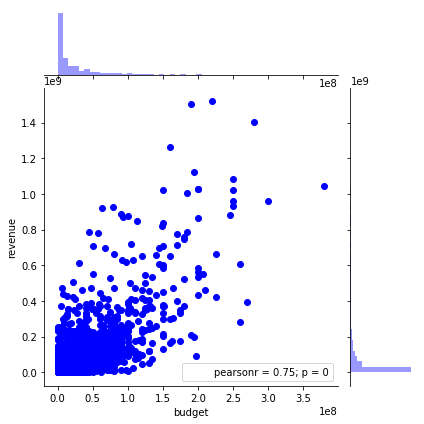

In [8]:
sns.jointplot(x='budget', y='revenue', data=train, ratio=4, color='b')
plt.savefig("Images/budget_vs_rev")

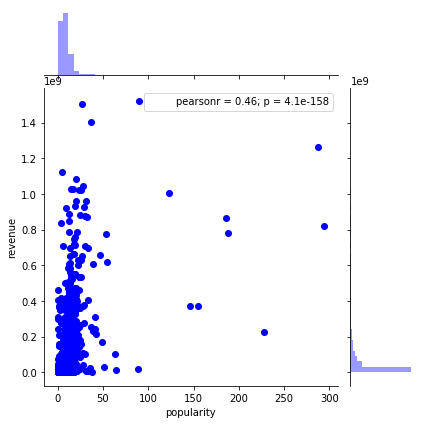

In [9]:
sns.jointplot(x='popularity', y='revenue', data=train, ratio=4, color='b')
plt.savefig("Images/popularity_vs_rev")

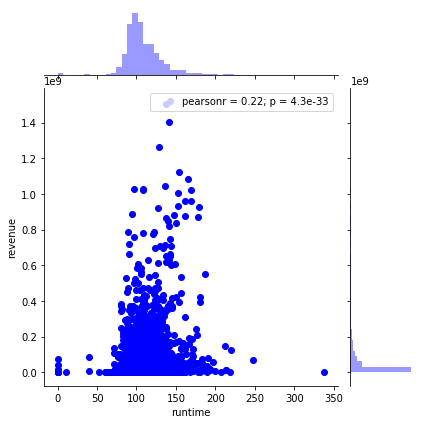

In [10]:
sns.jointplot(x='runtime', y='revenue', data=train, ratio=4, color='b')
plt.savefig("Images/runtime_vs_rev")

In [11]:
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)

train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train['release_date']) 

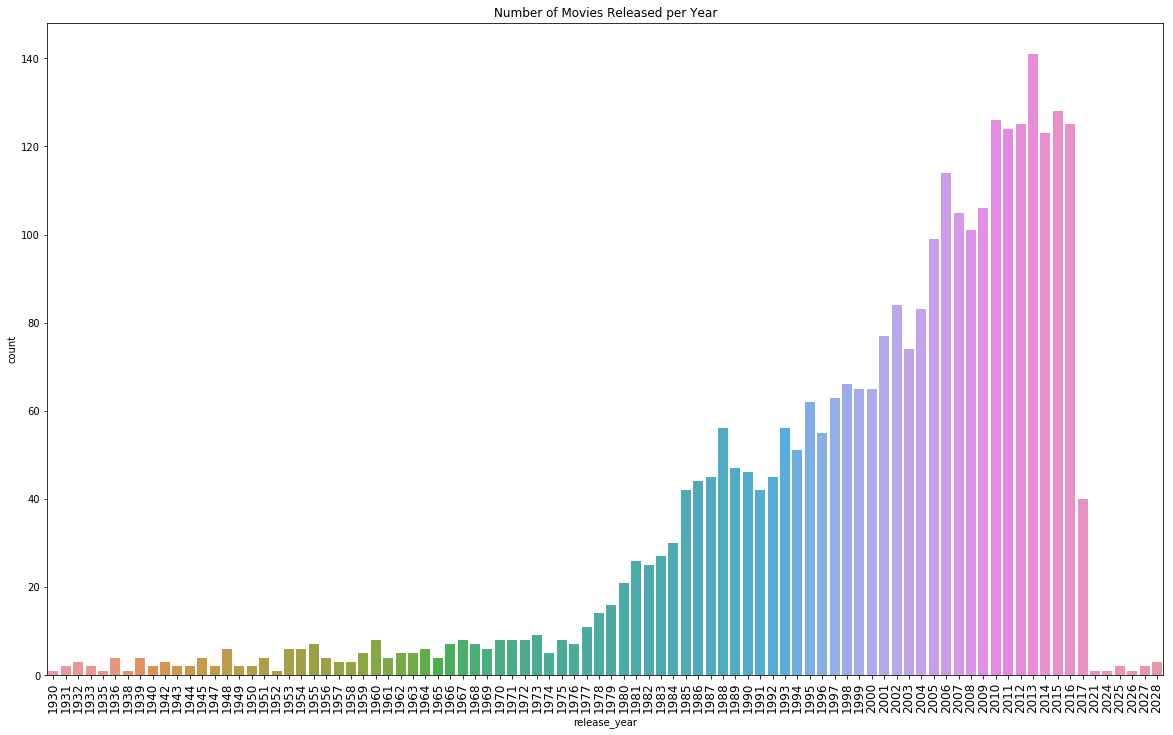

In [12]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_year'].sort_values())
plt.title("Number of Movies Released per Year")
loc, labels = plt.xticks()
plt.xticks(fontsize=12, rotation=90)
plt.savefig("Images/movies_per_year")

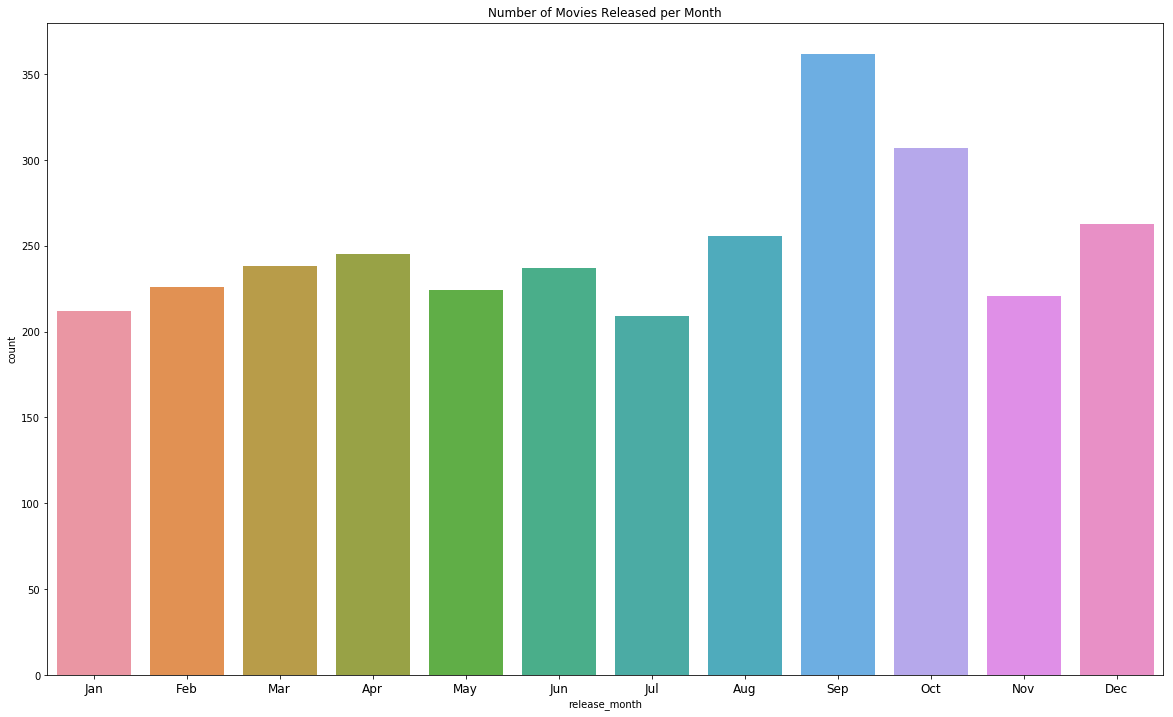

In [13]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_month'].sort_values())
plt.title("Number of Movies Released per Month")
loc, labels = plt.xticks()
loc, labels = loc, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(loc, labels, fontsize=12)
plt.savefig("Images/movies_per_month")

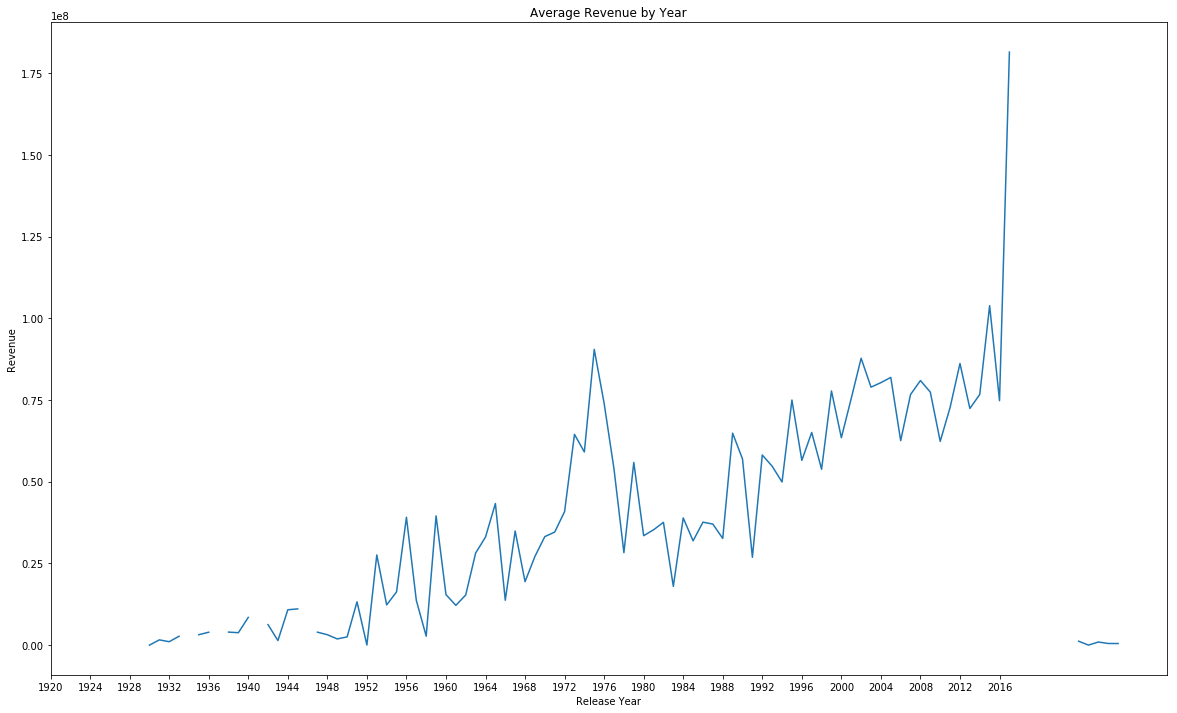

In [14]:
train['meanRevenueByYear'] = train.groupby('release_year')['revenue'].aggregate('mean')
train['meanRevenueByYear'].plot(figsize=(20, 12))
plt.xticks(np.arange(1920, 2018, 4))
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.title('Average Revenue by Year')
plt.savefig("Images/avg_rev_per_year")

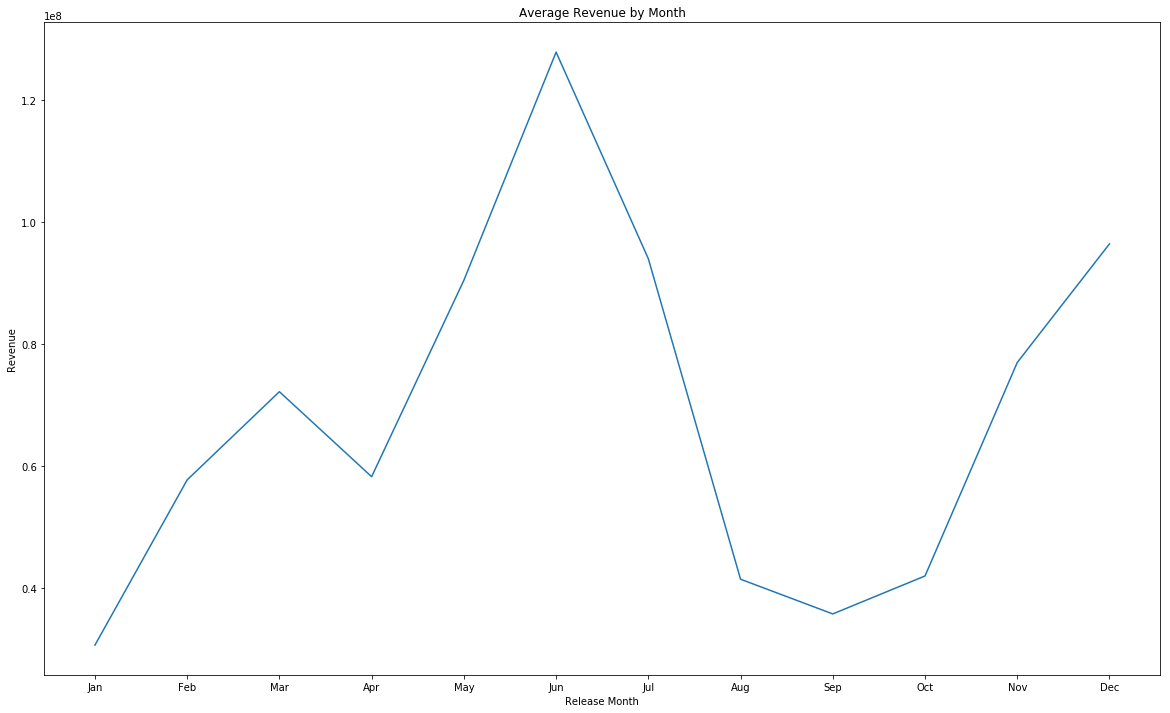

In [15]:
train['meanRevenueByMonth'] = train.groupby('release_month')['revenue'].aggregate('mean')
train['meanRevenueByMonth'].plot(figsize=(20, 12))
plt.xticks(np.arange(1,13,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Release Month')
plt.ylabel('Revenue')
plt.title('Average Revenue by Month')
plt.savefig("Images/avg_rev_per_month")

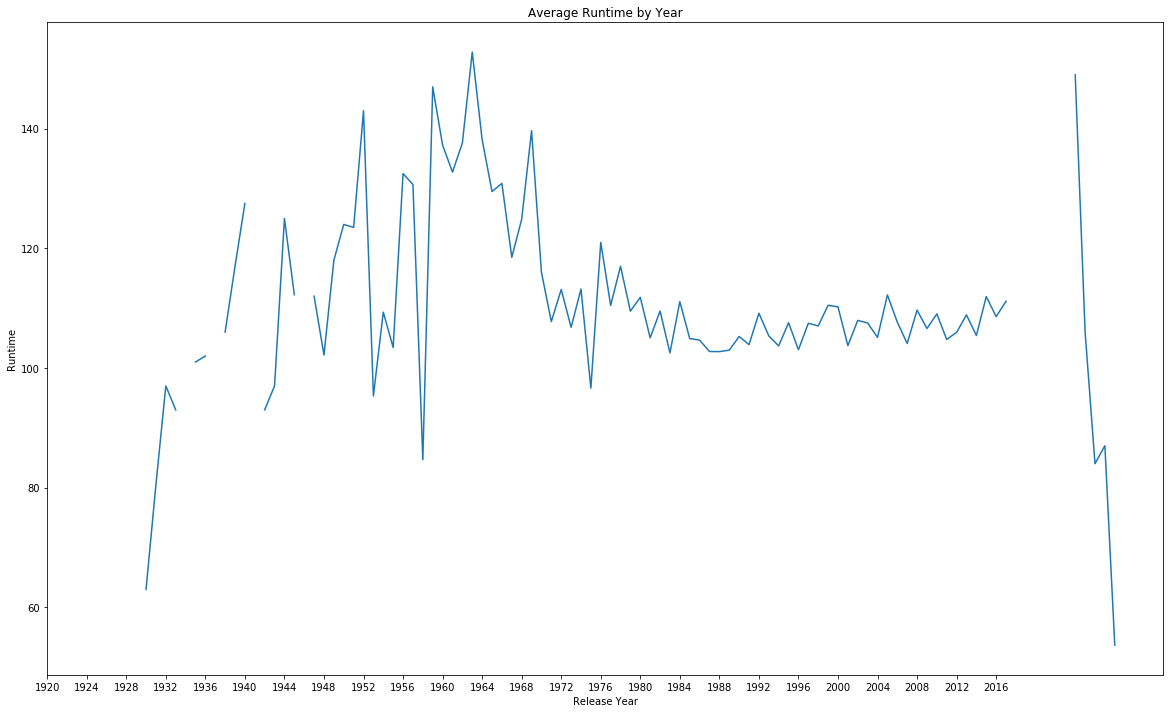

In [16]:
train['meanRuntimeByYear'] = train.groupby('release_year')['runtime'].aggregate('mean')
train['meanRuntimeByYear'].plot(figsize=(20, 12))
plt.xticks(np.arange(1920, 2018, 4))
plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.title('Average Runtime by Year')
plt.savefig("Images/avg_run_per_year")

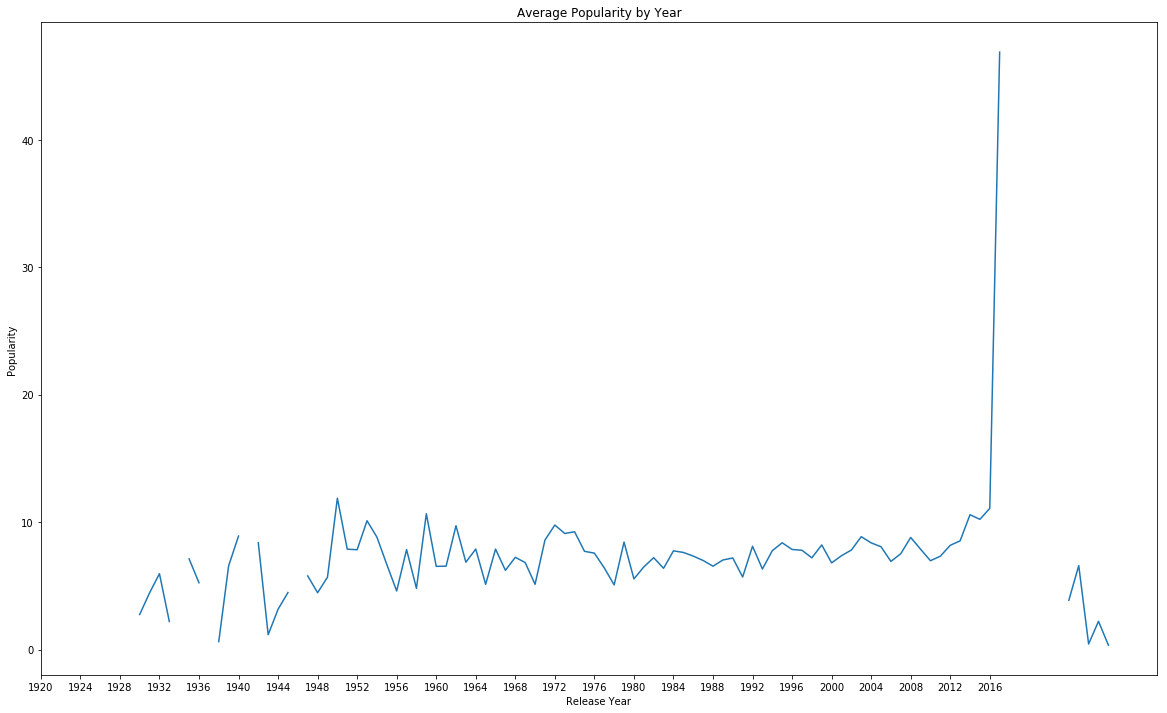

In [17]:
train['meanPopularityByYear'] = train.groupby('release_year')['popularity'].aggregate('mean')
train['meanPopularityByYear'].plot(figsize=(20, 12))
plt.xticks(np.arange(1920, 2018, 4))
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.title('Average Popularity by Year')
plt.savefig("Images/avg_pop_per_year")

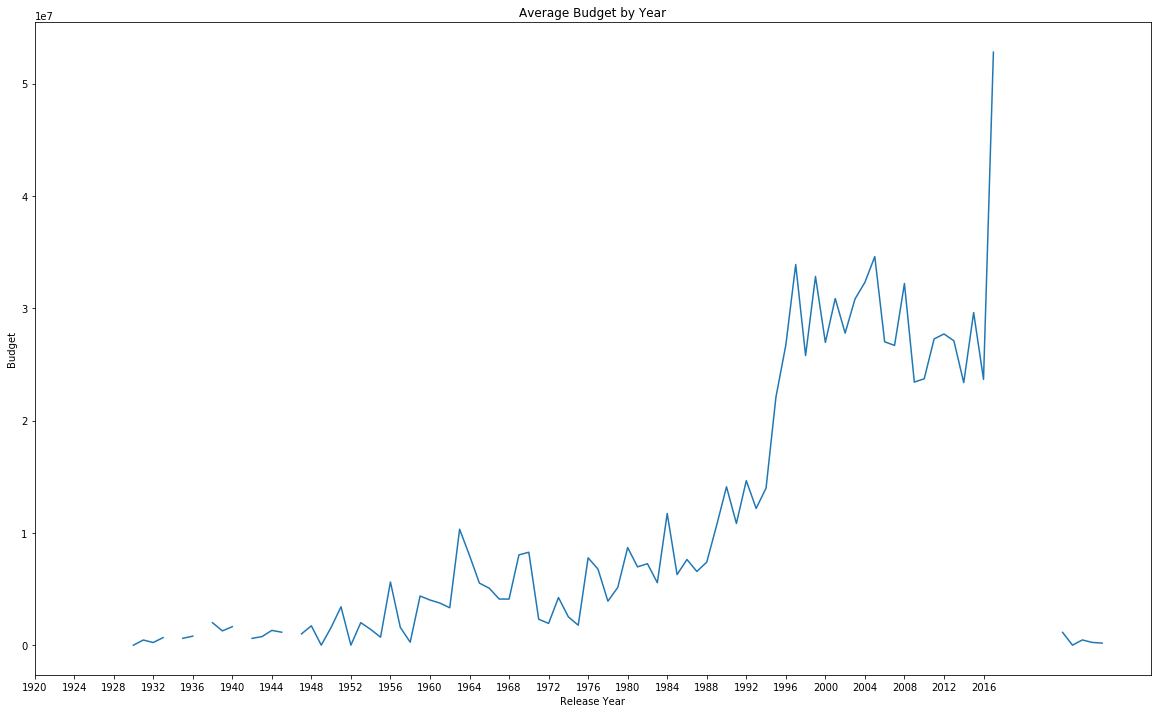

In [18]:
train['meanBudgetByYear'] = train.groupby('release_year')['budget'].aggregate('mean')
train['meanBudgetByYear'].plot(figsize=(20, 12))
plt.xticks(np.arange(1920, 2018, 4))
plt.xlabel('Release Year')
plt.ylabel('Budget')
plt.title('Average Budget by Year')
plt.savefig("avg_bug_per_year")